In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

In [3]:
n_users = 1000

In [4]:
user_ids = range(1, n_users + 1)

In [5]:
groups = np.random.choice(['A','B'], size = n_users)

In [6]:
conversions = np.where(
    groups == 'A',
    np.random.choice([0,1], size = n_users, p=[0.90, 0.10]),
    np.random.choice([0,1], size = n_users, p=[0.88, 0.12])
)

In [7]:
time_spent = np.where(
    groups == 'A',
    np.random.normal(5,2,n_users),
    np.random.normal(5.5,2, n_users)
)

In [10]:
purchase_amounts = np.where(
    conversions == 1,
    np.random.normal(100,20, n_users), 0
)

In [11]:
dfab = pd.DataFrame({
    'user_id': user_ids,
    'group': groups,
    'converted': conversions,
    'time_spent_minute': np.round(time_spent, 2),
    'purchase_amount': np.round(purchase_amounts,2)
})

In [12]:
dfab.head()

,user_id,group,converted,time_spent_minute,purchase_amount
0,1,A,0,6.04,0.0
1,2,B,0,3.39,0.0
2,3,A,0,6.11,0.0
3,4,A,0,5.18,0.0
4,5,A,0,4.61,0.0


In [13]:
from scipy import stats

In [18]:
def perform_ab_test(dfab):
    group_a = dfab[dfab['group'] == 'A']
    group_b = dfab[dfab['group'] == 'B']
 
    conv_rate_a = group_a['converted'].mean() * 100
    conv_rate_b = group_b['converted'].mean() * 100

    contingency = pd.crosstab(dfab['group'], dfab['converted'])
    chi2, p_value_conv = stats.chi2_contingency(contingency)[:2]

    t_stat_time, p_value_time = stats.ttest_ind(
        group_a['time_spent_minute'],
        group_b['time_spent_minute']
    )

    converted_a = group_a[group_a['converted'] == 1]['purchase_amount']
    converted_b = group_b[group_b['converted'] == 1]['purchase_amount']

    t_stat_purchase, p_value_purchase = stats.ttest_ind(
        converted_a,
        converted_b
    )

    results = {
        'Conversion Rate': {
            'Group A': f"{conv_rate_a:.2f}%",
            'Group B': f"{conv_rate_b:.2f}%",
            'Absolute Difference': f"{abs(conv_rate_b - conv_rate_a):.2f}%",
            'Relative Lift': f"{((conv_rate_b - conv_rate_a) / conv_rate_a * 100):.2f}%",
            'P-value': p_value_conv,
            'Significant': p_value_conv < 0.05
        },
        'Time Spent (minutes)': {
            'Group A Mean': f"{group_a['time_spent_minute'].mean():.2f}",
            'Group B Mean': f"{group_b['time_spent_minute'].mean():.2f}",
            'Absolute Difference': f"{abs(group_b['time_spent_minute'].mean() - group_a['time_spent_minute'].mean()):.2f}",
            'P-value': p_value_time,
            'Significant': p_value_time < 0.05
        },
        'Purchase Amount': {
            'Group A Mean': f"${converted_a.mean():.2f}",
            'Group B Mean': f"${converted_b.mean():.2f}",
            'Absolute Difference': f"${abs(converted_b.mean() - converted_a.mean()):.2f}",
            'P-value': p_value_purchase,
            'Significant': p_value_purchase < 0.05
        }
    }
    
    return pd.DataFrame(results).T

In [19]:
results_df = perform_ab_test(dfab)
print("\nA/B Testing Results:")
print("-------------------")
print(results_df)


A/B Testing Results:
-------------------
                     Group A Group B Absolute Difference Relative Lift  \
Conversion Rate        9.39%  10.39%               1.00%        10.70%   
Time Spent (minutes)     NaN     NaN                0.30           NaN   
Purchase Amount          NaN     NaN               $0.10           NaN   

                       P-value Significant Group A Mean Group B Mean  
Conversion Rate       0.670306       False          NaN          NaN  
Time Spent (minutes)  0.021287        True         5.10         5.40  
Purchase Amount       0.982509       False       $99.51       $99.41  


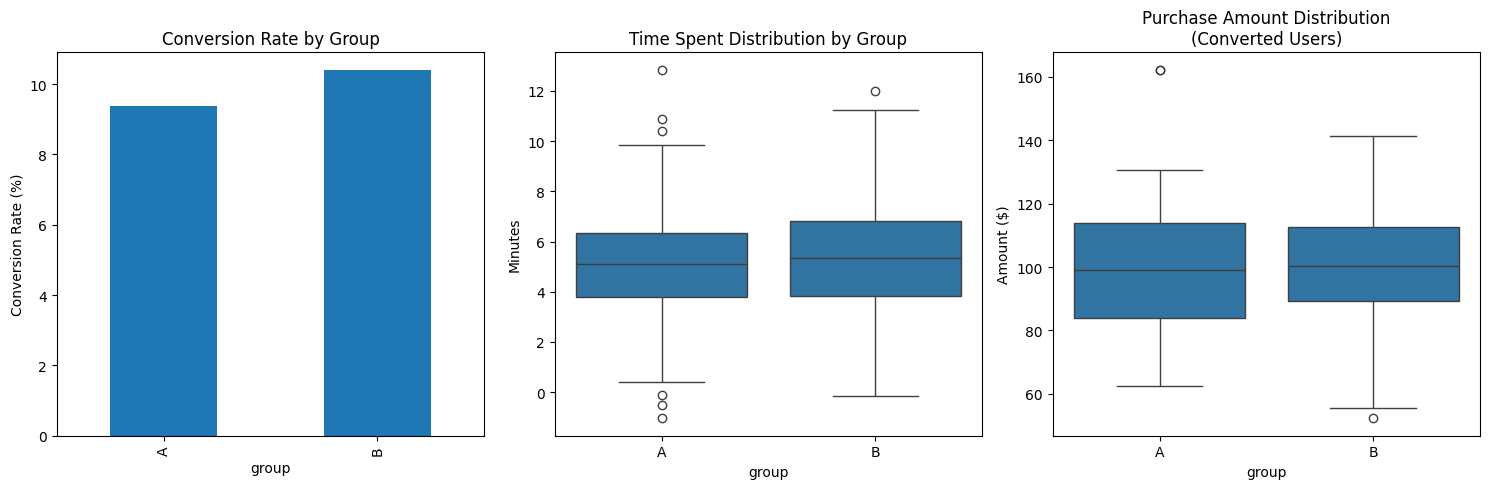

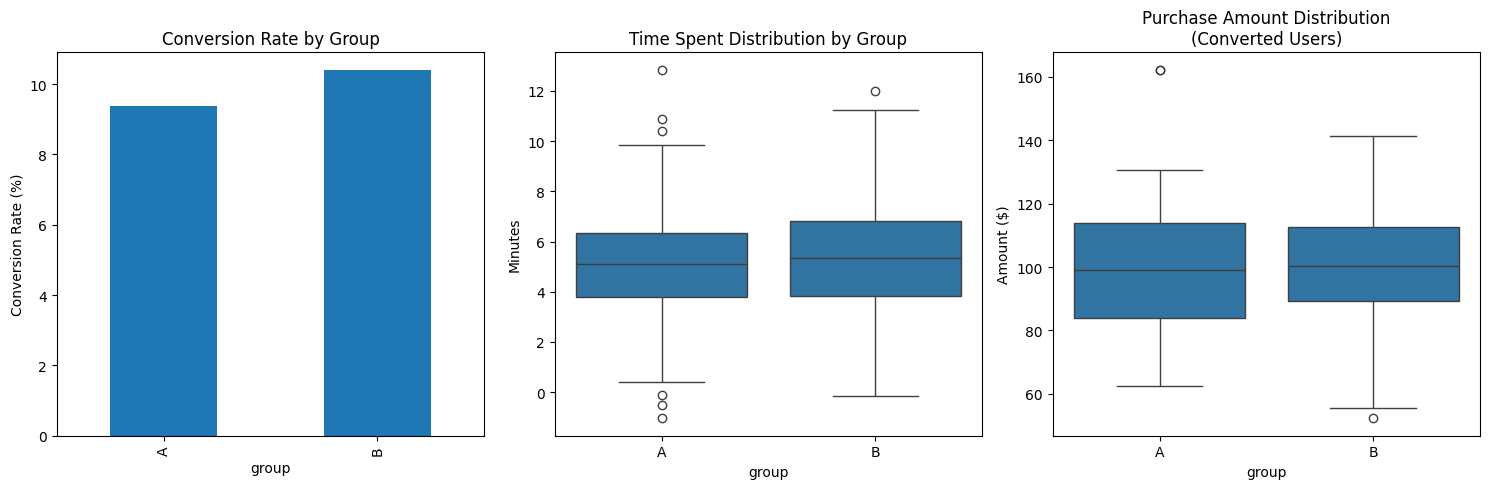

In [21]:
def plot_metrics(dfab):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    conv_by_group = dfab.groupby('group')['converted'].mean() * 100
    conv_by_group.plot(kind='bar', ax=axes[0], title='Conversion Rate by Group')
    axes[0].set_ylabel('Conversion Rate (%)')
    
    sns.boxplot(x='group', y='time_spent_minute', data=dfab, ax=axes[1])
    axes[1].set_title('Time Spent Distribution by Group')
    axes[1].set_ylabel('Minutes')
    
    sns.boxplot(x='group', y='purchase_amount', 
                data=dfab[dfab['converted']==1], ax=axes[2])
    axes[2].set_title('Purchase Amount Distribution\n(Converted Users)')
    axes[2].set_ylabel('Amount ($)')
    
    plt.tight_layout()
    return fig

plot_metrics(dfab)

====================================================================================================================================================================

====================================================================================================================================================================

In [22]:
dlr = pd.read_csv(r"D:\Dokumen\Python\Data Engineering 1\Wine.csv")

In [23]:
dlr.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [24]:
import statsmodels.api as sm

In [25]:
print(dlr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


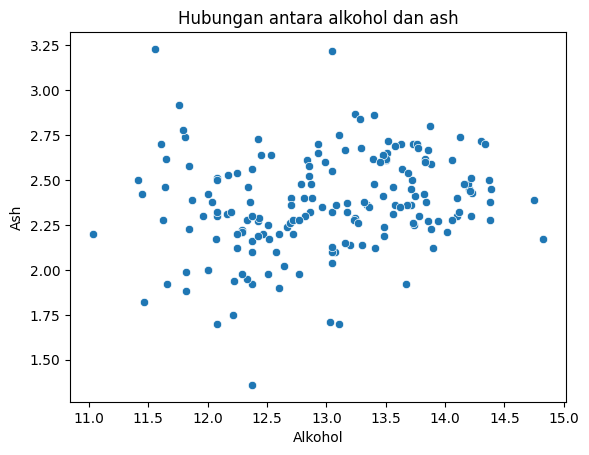

In [26]:
sns.scatterplot(x=dlr['Alcohol'], y=dlr['Ash'])
plt.title("Hubungan antara alkohol dan ash")
plt.xlabel("Alkohol")
plt.ylabel("Ash")
plt.show()

In [27]:
x = dlr['Alcohol']
y = dlr['Ash']

In [28]:
x = sm.add_constant(x)

In [29]:
model = sm.OLS(y,x).fit()

In [30]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Ash   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     8.245
Date:                Fri, 27 Dec 2024   Prob (F-statistic):            0.00459
Time:                        19:29:15   Log-Likelihood:                -17.775
No. Observations:                 178   AIC:                             39.55
Df Residuals:                     176   BIC:                             45.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4371      0.324      4.432      0.0

In [31]:
predictions = model.predict(x)

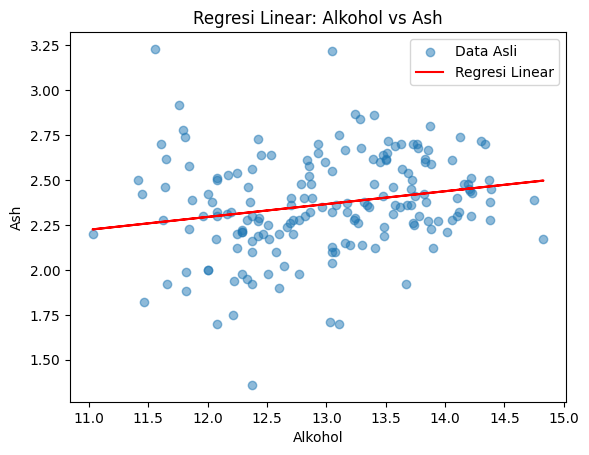

In [32]:
plt.scatter(dlr['Alcohol'], dlr['Ash'], label = 'Data Asli', alpha=0.5)
plt.plot(dlr['Alcohol'], predictions, color = 'red', label = 'Regresi Linear')
plt.title("Regresi Linear: Alkohol vs Ash")
plt.xlabel("Alkohol")
plt.ylabel("Ash")
plt.legend()
plt.show()

=====================================================================================================================================================================

In [34]:
dlr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [35]:
p = dlr[['Ash', 'Hue','Proline']]
q = dlr['Magnesium']

In [36]:
p = sm.add_constant(p)

In [37]:
modelm = sm.OLS(q, p).fit()

In [38]:
print(modelm.summary())

                            OLS Regression Results                            
Dep. Variable:              Magnesium   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     14.17
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           2.63e-08
Time:                        19:36:54   Log-Likelihood:                -705.92
No. Observations:                 178   AIC:                             1420.
Df Residuals:                     174   BIC:                             1433.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.0299      9.686      6.507      0.0

In [39]:
predictionm = modelm.predict(p)

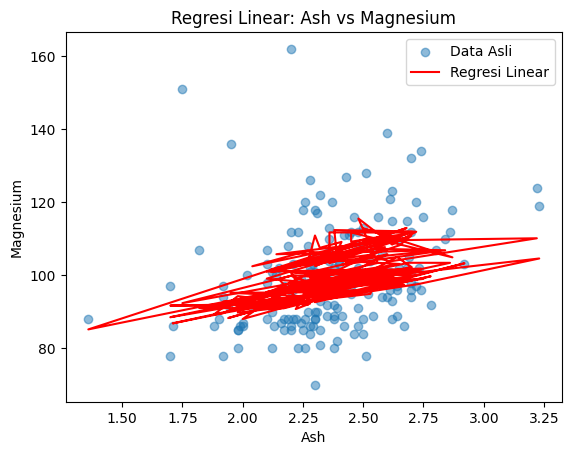

In [41]:
plt.scatter(dlr['Ash'], dlr['Magnesium'], label = 'Data Asli', alpha=0.5)
plt.plot(dlr['Ash'], predictionm, color = 'red', label = 'Regresi Linear')
plt.title("Regresi Linear: Ash vs Magnesium")
plt.xlabel("Ash")
plt.ylabel("Magnesium")
plt.legend()
plt.show()

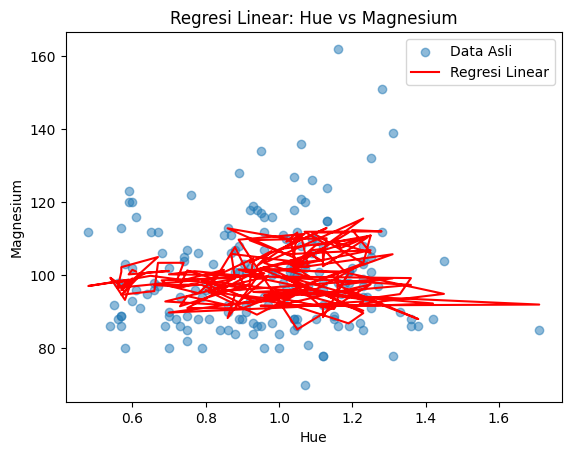

In [44]:
plt.scatter(dlr['Hue'], dlr['Magnesium'], label = 'Data Asli', alpha=0.5)
plt.plot(dlr['Hue'], predictionm, color = 'red', label = 'Regresi Linear')
plt.title("Regresi Linear: Hue vs Magnesium")
plt.xlabel("Hue")
plt.ylabel("Magnesium")
plt.legend()
plt.show()

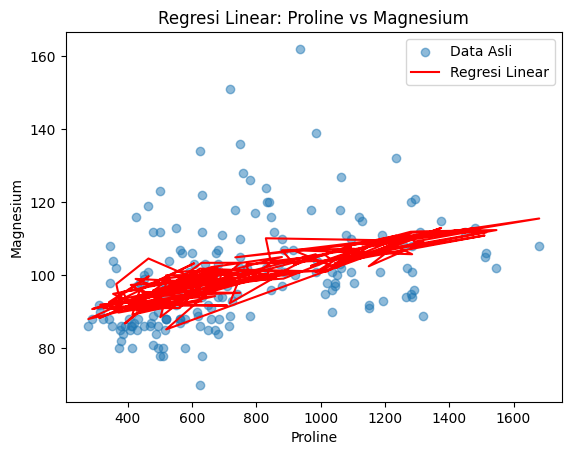

In [43]:
plt.scatter(dlr['Proline'], dlr['Magnesium'], label = 'Data Asli', alpha=0.5)
plt.plot(dlr['Proline'], predictionm, color = 'red', label = 'Regresi Linear')
plt.title("Regresi Linear: Proline vs Magnesium")
plt.xlabel("Proline")
plt.ylabel("Magnesium")
plt.legend()
plt.show()